<a href="https://colab.research.google.com/github/HaHuyHoang19146188/BAII-TAP-AI_TUAN12/blob/main/cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện
import numpy as np
import pandas as pd
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout

In [ ]:
#chia dữ liệu thành 2 tập train và test
(x_train, y_train),(x_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 4s 0us/step


In [ ]:
#quan sát chiều dữ liệu
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
#tạo mạng nơ-ron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 4096)              2101248   
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               2097664   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
#chạy model
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

Epoch 1/500
313/313 [==============================] - 56s 175ms/step - loss: 4.4636 - accuracy: 0.0342 - val_loss: 4.1664 - val_accuracy: 0.0566
Epoch 2/500
313/313 [==============================] - 54s 172ms/step - loss: 4.0975 - accuracy: 0.0686 - val_loss: 3.9617 - val_accuracy: 0.0908
Epoch 3/500
313/313 [==============================] - 56s 179ms/step - loss: 3.9280 - accuracy: 0.0946 - val_loss: 3.8469 - val_accuracy: 0.1120
Epoch 4/500
313/313 [==============================] - 54s 172ms/step - loss: 3.8277 - accuracy: 0.1106 - val_loss: 3.8763 - val_accuracy: 0.1100
Epoch 5/500
313/313 [==============================] - 56s 178ms/step - loss: 3.7590 - accuracy: 0.1232 - val_loss: 3.7366 - val_accuracy: 0.1339
Epoch 6/500
313/313 [==============================] - 54s 172ms/step - loss: 3.6961 - accuracy: 0.1364 - val_loss: 3.6549 - val_accuracy: 0.1459
Epoch 7/500
313/313 [==============================] - 56s 178ms/step - loss: 3.6602 - accuracy: 0.1413 - val_loss: 3.6878 -

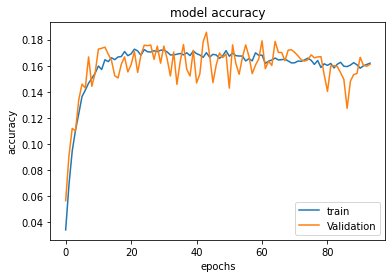

In [ ]:
#vẽ đồ thị
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
#đánh giá kết quả
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  3.642573833465576
Độ chính xác kiểm tra là:  0.15889999270439148
